Bayesian A/B Testing
-----

A couple of front-end web developers are interested in which of their designs yields more sales. They route some fraction of visitors to site A, and the other fraction to site B, and record if the visit yielded a sale or not.

You’ll find some click-through data in the data folder. There are two files, one for each version of the site.

The 0 refers to a visit without a conversion.  
The 1 refers to a visit with a conversion.

__TODO__: Load in the data:

In [72]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.special import betaln
from scipy.stats import beta

%matplotlib inline

In [11]:
siteA = pd.read_csv ("data/siteA.txt")
siteB = pd.read_csv ("data/siteB.txt")

In [37]:
siteA.head()


,0
0,0
1,0
2,0
3,0
4,0


In [17]:
siteA.describe()

,0
count,799.000000
mean,0.066333
std,0.249019
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [18]:
siteB.describe()

,0
count,799.000000
mean,0.102628
std,0.303663
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


__TODO__: Fit and plot a beta distribution to each set of observations

In [185]:
siteA_click = sum(siteA.iloc[:,0]) # sum of the columns, total number of clicks
siteA_noclick = len(siteA)-sum(siteA.iloc[:,0]) 

siteB_click = sum(siteB.iloc[:,0])
siteB_noclick = len(siteB) - sum(siteB.iloc[:,0])

In [186]:
print(f"Site A has {siteA_click } clicks")

Site A has 53 clicks


In [187]:
print(f"Site B has {siteB_click } clicks")

Site B has 82 clicks


In [188]:
# assume uniform prior
a_prior, b_prior = 1, 1 # Assume uniform prior
# a_prior, b_prior = 3, 3 # Assume non-uniform prior
rv = beta(a_prior, b_prior)
x = np.linspace(beta.ppf(0.01, a_prior, b_prior), beta.ppf(0.99, a_prior, b_prior), 100)

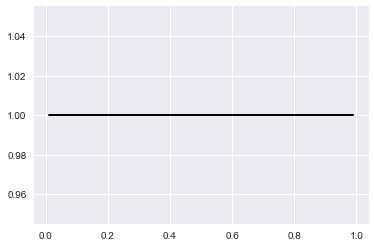

In [189]:
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='');

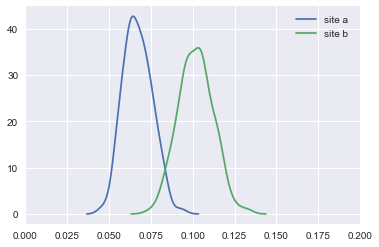

In [190]:
# add in priors to the beta distributions
sns.kdeplot(stats.beta(siteA_click  ,siteA_noclick ).rvs(200),label='site a ')
sns.kdeplot(stats.beta(siteB_click,siteB_noclick ).rvs(200),label='site b')
plt.legend()
plt.xlim(0,.2);

__TODO__: What is the interperation of the plot?

In [191]:
# It looks like there is a difference in the perforamnce between the two web sites

__TODO__: Generate random samples from each distribution. Use this to find how much more probable the likelihood of B is than A

In [192]:
print(f" Probability site B is better than A under simulation is {sum(stats.beta(siteA_click,siteA_noclick).rvs(200)\
      <stats.beta(siteB_click,siteB_noclick).rvs(200))/200:%}")

 Probability site B is better than A under simulation is 99.500000%


__TODO__:  Compute the X% confidence on both A and B separately. Start with 95%.

In [193]:
A_a = siteA_click + a_prior
A_b = siteA_noclick + b_prior
B_a = siteB_click + a_prior
B_b = siteB_noclick + b_prior

prob_B_better_A = 0.0
for i in range(B_a-1):
    prob_B_better_A += np.exp(betaln(A_a+i, B_b+A_b)-np.log(B_b+i) \
                              - betaln(1+i, B_b) - betaln(A_a, A_b))
print(f"The probabilty that B is better than A: {prob_B_better_A:.3%}")

The probabilty that B is better than A: 99.435%


In [263]:
print(f"range of site B with 95% confidence {stats.beta(siteB_click,siteB_noclick ).ppf(.025):%} -\
      {stats.beta(siteB_click,siteB_noclick ).ppf(.975):%}" )

range of site B with 95% confidence 8.256200% -      12.457775%


In [262]:
print(f"range of site A with 95% confidence {stats.beta(siteA_click,siteA_noclick ).ppf(.025):%} -\
      {stats.beta(siteA_click,siteA_noclick ).ppf(.975):%}" )

range of site A with 95% confidence 5.014242% -      8.457760%


__TODO__: What is the probability that site B is 2 percentage points better than site A?

In [246]:
print(f" Probability site B is 2 % better than A under simulation is {sum((stats.beta(siteA_click,siteA_noclick).rvs(2000)+.02)\
      <(stats.beta(siteB_click,siteB_noclick).rvs(2000)))/2000:%}")

 Probability site B is 2 % better than A under simulation is 87.600000%


In [249]:
sum((stats.beta(siteB_click,siteB_noclick ).rvs(2000)-stats.beta(siteA_click  ,siteA_noclick ).rvs(2000))>.02)/2000

0.88449999999999995

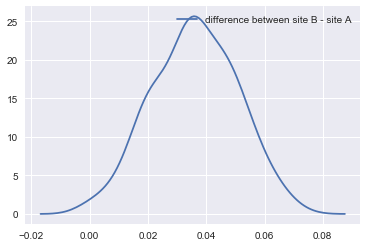

In [203]:
sns.kdeplot(stats.beta(siteB_click,siteB_noclick ).rvs(200)-stats.beta(siteA_click  ,siteA_noclick ).rvs(200),
           label='difference between site B - site A')
plt.legend(loc='upper right')

The company is debating whether to switch to site B from site A.

Assume the following:

- The average click on site A yields \$1.00 in profit
- The average click on site B yields \$1.05 in profit

 Should your company invest in switching to site B? Why or why not? Where is the cost / benifets tradeoff?

In [200]:
print(f" The difference in profit between site B and site A is ${round(siteB_click*1.05-siteA_click*1,4)}")

 The difference in profit between site B and site A is $33.1


- We are ~99% confident that we wil earn an additional 33 dollars. Therefore, we should implement site B unless the implementation cost > 33.

<br>